In [1]:
#Instalando pacotes
!pip install -q -U watermark # utilizado para verificar versão usada
!pip install -q missingno # mapa de valores ausentes
!pip install -q category_encoders # categorização em dados
!pip install -q plotly # criação de gráficos

ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\jeffe\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\jeffe\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\jeffe\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\jeffe\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# importação de bibliotecas necessárias na análise

# bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
# Versões dos pacotes usados neste notebook
%reload_ext watermark
%watermark -a "Data Nerd" --iversions

Author: Data Nerd

numpy            : 1.20.3
category_encoders: 2.5.0
missingno        : 0.5.1
pandas           : 1.2.4
matplotlib       : 3.5.2
seaborn          : 0.11.2
plotly           : 5.9.0
scipy            : 1.8.0
sys              : 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]



## Carregando os Dados

In [4]:
# Carrega o dataset
df =  pd.read_csv("dataset/aug_train.csv")

In [5]:
# Shape (Linhas, Colunas)
df.shape

(19158, 14)

In [6]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratório de Dados

In [13]:
# Descrevendo os dados não numéricos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [15]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores são 0,828 mediana 0,903 e desvio padrão(std) 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.
* Em **trainning_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

## Visualizando as Variáveis Categóricas

In [19]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

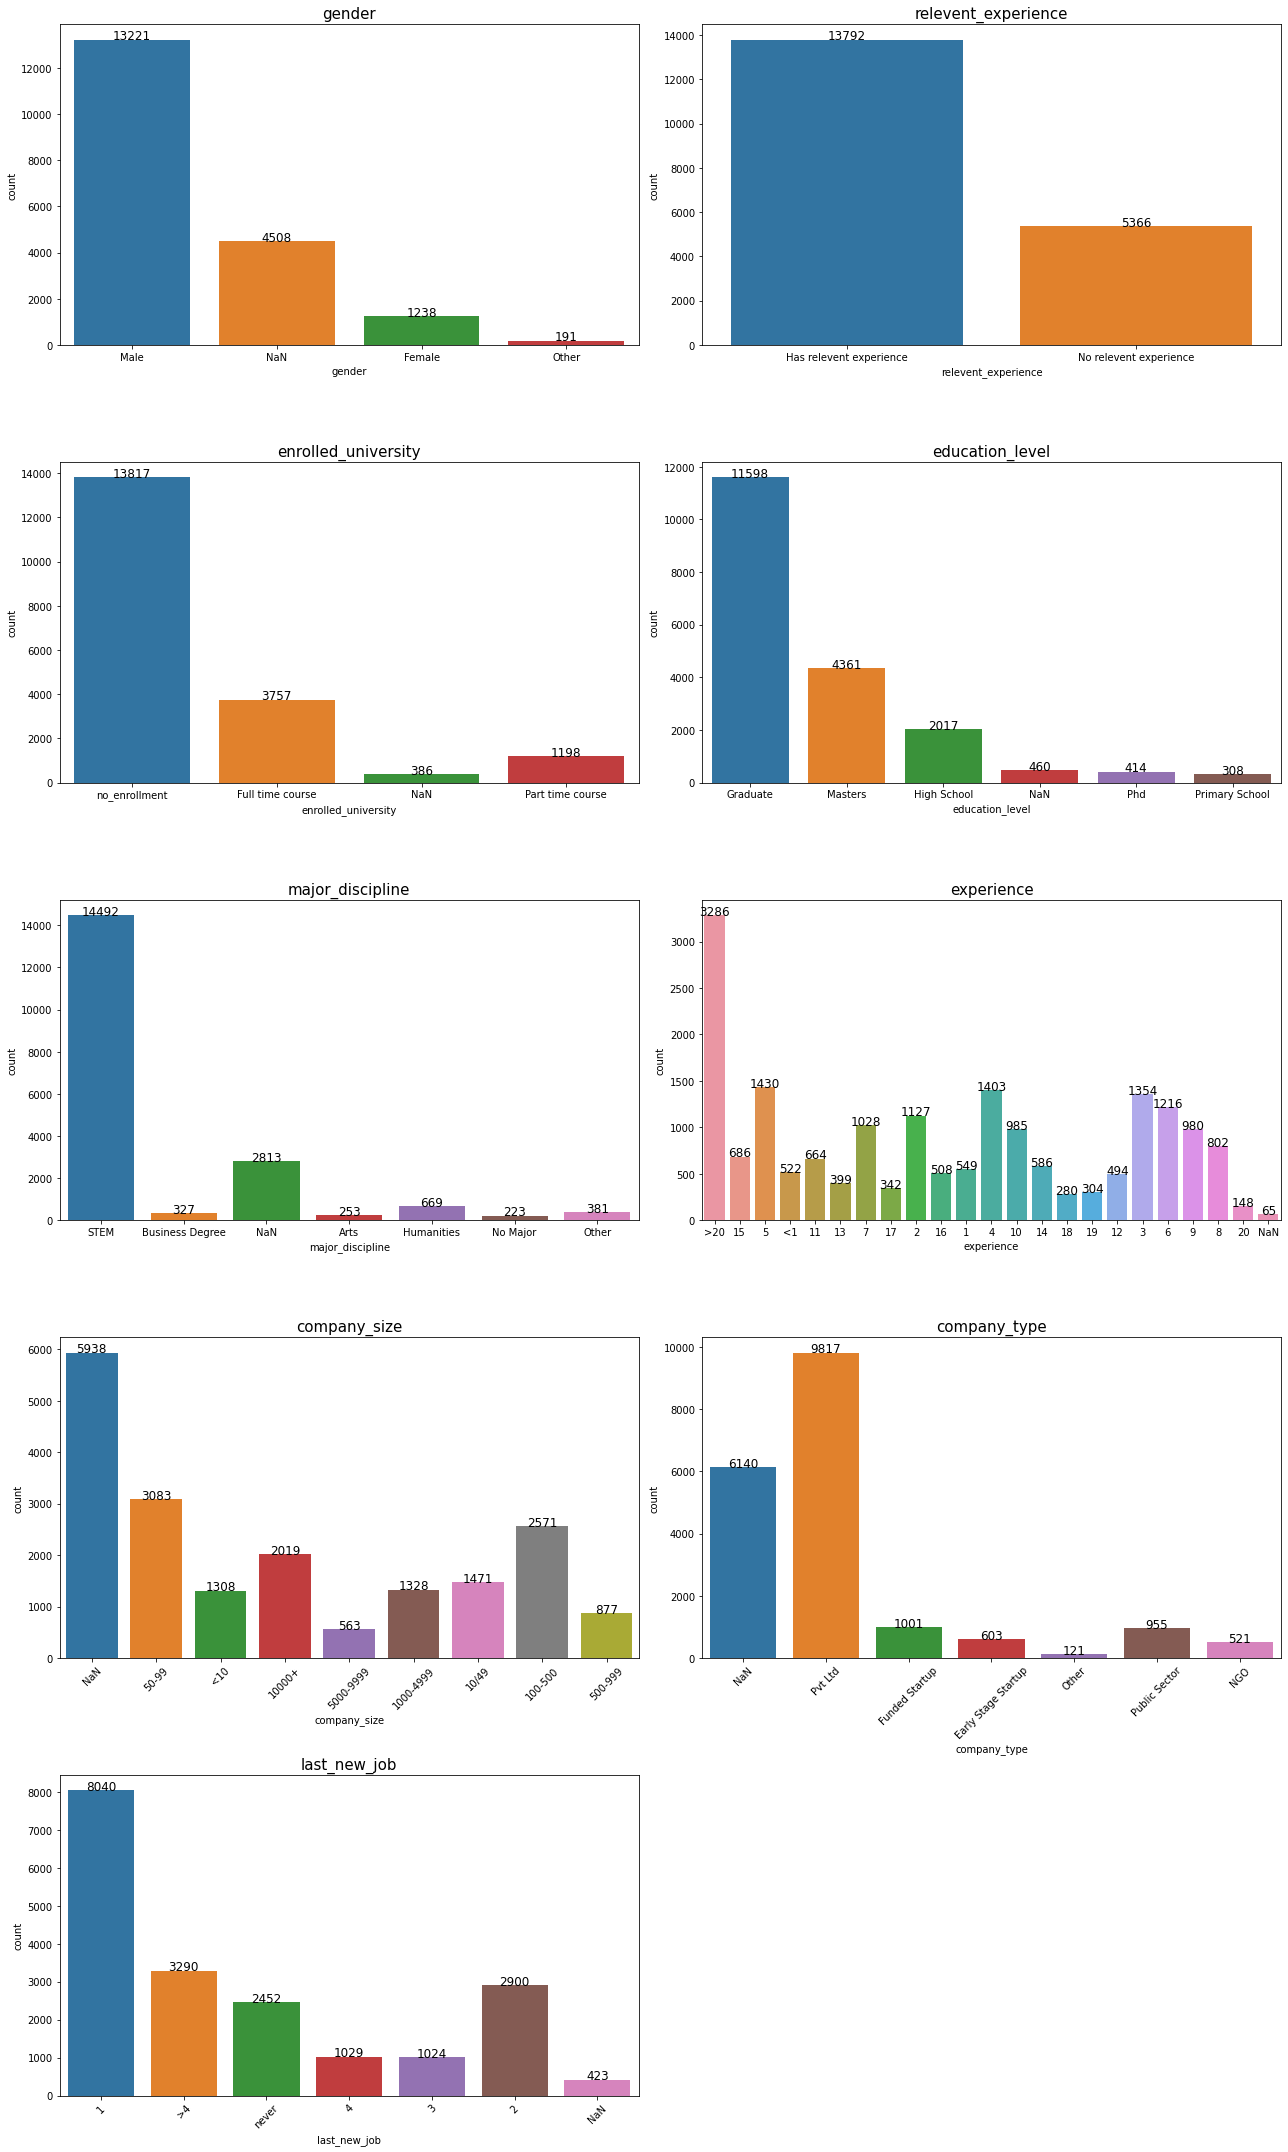

In [20]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A=0

# Loop
for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    ax=sns.countplot(data=df.fillna('NaN'),x=i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size=12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout

plt.tight_layout(h_pad = 2)